# CMSC 478 Machine Learning


## Getting Started with Tensorflow, Keras, and Tensorboard

### Instructor: Fereydoon Vafaei

Benjamin Thai MX08618

This notebook helps you get started with Tensorflow/Keras API. **READ ALL SECTIONS VERY CAREFULLY!**

**Note**: You should install Tensorflow 2 before starting this notebook.<br> If you have not installed Tensorflow 2 or have installed previous versions of Tensorflow, you need to [install Tensorflow 2](https://www.tensorflow.org/install) before proceeding. Alternatively, you can install Tensorflow 2 using [conda environment](https://docs.anaconda.com/anaconda/user-guide/tasks/tensorflow/). CPU-only TensorFlow is sufficient for this course.

**RUN ALL CELLS REQUIREMENT**: You must run all cells to get the outputs and then attempt exercises. Otherwise, if any cell is not run with the correct output, your notebook gets ZERO.

<b>Course Policy Reminder:</b>
Debugging and error resolution are always students' responsbility. This policy will be enforced in email communications and the office hours. Keep in mind that all assignments are individual graded tasks. Any collaboration with other students is strictly prohibited and is considered as cheating. Students should NOT share any answer, solution, or code with other students. Violations of these policies would be penalized according to UMBC academic integrity policy.

## Table of Contents:
* [Installation Verification](#Installation-Verification)
* [A Simple Regression NN](#A-One-Layer-One-Neuron-Regression-Neural-Network-using-Tensorflow/Keras)
* [A Multi-layer NN on MNIST Dataset](#A-Multi-Layer-NN-for-Multi-Class-Classification-on-MNIST-Dataset)
* [Eager Execution in Tensorflow-2](#Eager-Execution-in-Tensorflow-2)
* [Creating the model using the Sequential API](#Creating-the-model-using-the-Sequential-API)
* [Fashion MNIST Dataset](#Fashion-MNIST-Dataset)
* [California House Pricing](#California-House-Pricing)
* [Saving and Restoring the Models](#Saving-and-Restoring-the-Models)
* [Callbacks](#Callbacks)
* [Tensorboard](#Tensorboard)
* [Exercise-1](#Exercise-1)
* [Exercise-2](#Exercise-2)
* [References](#References)
* [Grading and Submission](#Grading-and-Submission)

Tensorflow is one of the most popular ML/DL frameworks. Watch this video first:

https://www.youtube.com/watch?v=744f60NyAgc

### Installation Verification

Verify your installation using the following cells.

**Note**: It is recommended that you install (or upgrade to) the latest stable version of tensorflow 2. While the minimum requirement for tf version for this notebook is 2.0.0 (which is needed to run the textbook and slides codes), it is your responsibility to update tf to the latest stable version for the assignments when/if needed. 

In [1]:
import tensorflow as tf

In [5]:
from tensorflow import keras

In [6]:
# Your tf/keras version should be 2.x.x (latest stable version is recommended)
tf.__version__

'2.8.0'

In [7]:
keras.__version__

'2.8.0'

In [8]:
# Also check that all important packages can be imported. 
# Note: If you use a separate conda environment for tf, you may need to reinstall some of these libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

### A One-Layer One-Neuron Regression Neural Network using Tensorflow/Keras

Our first example is a regression NN with only one layer and one neuron to recognize the pattern of a sequence of numbers.

In [10]:
# A simple linear regression NN with one layer

# build a one-layer one-neuron NN
layer_1 = keras.layers.Dense(units=1, input_shape=[1])
model = tf.keras.Sequential([layer_1])

# compile model
model.compile(optimizer='sgd', loss='mean_squared_error') # 'mse'

# data: y = 2x - 1
xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float) 

# train NN
model.fit(xs, ys, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 434ms/step - loss: 2.1289
Epoch 2/1000
1/1 [==============================] - 0s 8ms/step - loss: 1.8205
Epoch 3/1000
1/1 [==============================] - 0s 11ms/step - loss: 1.5748
Epoch 4/1000
1/1 [==============================] - 0s 12ms/step - loss: 1.3787
Epoch 5/1000
1/1 [==============================] - 0s 11ms/step - loss: 1.2215
Epoch 6/1000
1/1 [==============================] - 0s 12ms/step - loss: 1.0950
Epoch 7/1000
1/1 [==============================] - 0s 12ms/step - loss: 0.9927
Epoch 8/1000
1/1 [==============================] - 0s 10ms/step - loss: 0.9095
Epoch 9/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.8415
Epoch 10/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.7853
Epoch 11/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.7386
Epoch 12/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.6994
Epoch 13/1000
1/1 [====================

In [11]:
# using NN, predict y when x=10.0
print("y_pred when x=10.0", model.predict([10.0]))

print("Parameters: {}".format(layer_1.get_weights()))

y_pred when x=10.0 [[18.999914]]
Parameters: [array([[1.9999878]], dtype=float32), array([-0.99996364], dtype=float32)]


### A Multi-Layer NN for Multi-Class Classification on MNIST Dataset

Load and prepare the [MNIST dataset](http://yann.lecun.com/exdb/mnist/). Convert the samples from integers to floating-point numbers:

In [12]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11501568/11490434 [==============================] - 0s 0us/step


In [13]:
x_train[500]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [15]:
# build a multi-layer NN for multi-class classification
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer - Use Flatten to make it a 1D vector
  tf.keras.layers.Dense(128, activation='relu'), # hidden layer with 128 neurons
  tf.keras.layers.Dropout(0.2), # dropout is a regularization technique
  tf.keras.layers.Dense(10, activation='softmax')]) # output layer has 10 neurons and softmax activation function

# compile model for multi-class classification
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # loss='SparseCategoricalCrossentropy'
              metrics=['accuracy'])

> **Notes**:

> These classifiers process vectors, which are 1D, whereas the current input is a rank-3 tensor (60000, 28, 28). To bridge the gap, we flatten the 3D inputs to 1D with a `Flatten` layer before adding the `Dense` layers.

> Use `loss='sparse_categorical_crossentropy'` loss function when there are two or more label classes. `tf` expects labels to be provided as integers. If you want to provide labels using `one-hot` representation, use `CategoricalCrossentropy` loss.

> Read more about the [`SparseCategoricalCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy) and [`CategoricalCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy) in their tf documentations.

In [16]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [18]:
# train NN
model.fit(x_train, y_train, epochs=5)

# test NN
model.evaluate(x_test,  y_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0641 - accuracy: 0.9801
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0566 - accuracy: 0.9812
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0514 - accuracy: 0.9833
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0455 - accuracy: 0.9848
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0448 - accuracy: 0.9858
313/313 - 1s - loss: 0.0676 - accuracy: 0.9796 - 1s/epoch - 3ms/step


[0.06763247400522232, 0.9796000123023987]

The image classifier is now trained to ~98% accuracy on this dataset.

### Eager Execution in Tensorflow 2

Tensorflow 2 has this new capability of ["Eager Execution"](https://www.tensorflow.org/guide/eager) which makes it more convenient to work with tensors and graph computations. See examples below and compare it with tensorflow 1 which uses Session() and Run() to execute these operations.

In [19]:
x = tf.Variable(3, name="x")

In [20]:
y = tf.Variable(4, name="y")

In [21]:
f = x*x*y + y + 2

In [22]:
x

<tf.Variable 'x:0' shape=() dtype=int32, numpy=3>

In [23]:
y

<tf.Variable 'y:0' shape=() dtype=int32, numpy=4>

In [24]:
f

<tf.Tensor: shape=(), dtype=int32, numpy=42>

In [25]:
print(f)

tf.Tensor(42, shape=(), dtype=int32)


In [26]:
print(x.numpy())
print(y.numpy())
print(f.numpy())

3
4
42


### Creating the model using the Sequential API

Now let’s review the steps in building a neural network! Here is a classification MLP with two hidden
layers:

In [27]:
# build a NN for MNIST
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28])) # the input layer
model.add(keras.layers.Dense(300, activation="relu")) # the first hidden layer with 300 neurons
model.add(keras.layers.Dense(100, activation="relu")) # the 2nd hidden layer with 100 neurons
model.add(keras.layers.Dense(10, activation="softmax")) # the output layer: it's a 10-class classification

Let’s go through this code line by line:
- The first line creates a Sequential model. This is the simplest kind of Keras model for neural networks that are just composed of a single stack of layers connected sequentially. This is called the Sequential API.

- Next, we build the first layer and add it to the model. It is a `Flatten` layer whose role is to convert each input image into a 1D array: if it receives input data X , it computes `X.reshape(-1, 1)`. This layer does not have any parameters; it is just there to do some simple preprocessing. Since it is the first layer in the model, you should specify the `input_shape` , which doesn’t include the batch size, only the shape of the instances. Alternatively, you could add a `keras.layers.InputLayer` as the first layer, setting `input_shape=[28,28]`

- Next we add a `Dense` hidden layer with 300 neurons. It will use the ReLU activation function. Each Dense layer manages its own weight matrix, containing all the connection weights between the neurons and their inputs. It also manages a vector of bias terms (one per neuron). When it receives some input data, it computes Equation 10-2.

$$h_{\mathbf{W}, \mathbf{b}}(\mathbf{X}) = \phi (\mathbf{X} \mathbf{W} + \mathbf{b})$$

- Then we add a second `Dense` hidden layer with 100 neurons, also using the ReLU activation function.

- Finally, we add a `Dense` output layer with 10 neurons (one per class), using the
softmax activation function (because the classes are exclusive).

> Specifying `activation="relu"` is equivalent to specifying `activation=keras.activations.relu`. Other activation functions are available in the keras.activations package. See https://keras.io/activations/ for the full list.

> Instead of adding the layers one by one as we just did, you can pass a list of layers when creating the Sequential model:

In [28]:
model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[28, 28]),
keras.layers.Dense(300, activation="relu"),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dense(10, activation="softmax")
])

### Fashion MNIST Dataset

This is [another example of image classification](https://github.com/zalandoresearch/fashion-mnist).

In [29]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [30]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [31]:
train_images.shape

(60000, 28, 28)

In [32]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

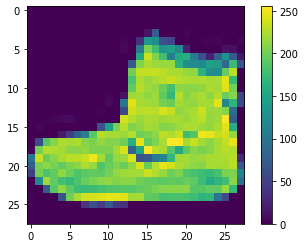

In [33]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [34]:
train_images = train_images / 255.0

test_images = test_images / 255.0

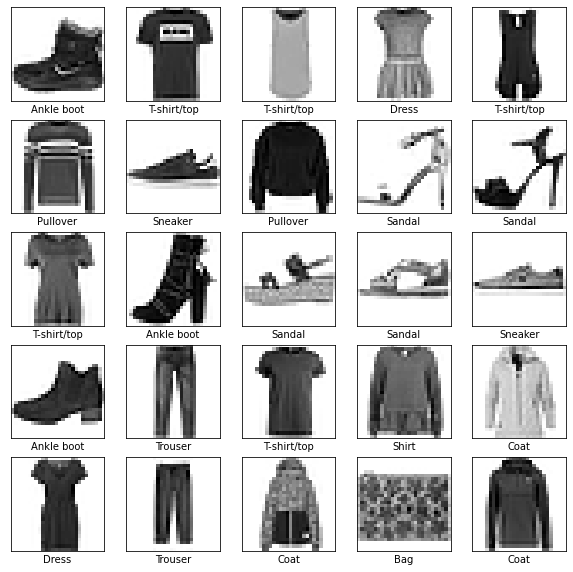

In [35]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [36]:
# build a multi-class classification NN
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')]) # the output layer has 10 neurons and softmax activation

In [37]:
# compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
history = model.fit(train_images, train_labels, validation_split=0.1, epochs=10)

Epoch 1/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.5035 - accuracy: 0.8258 - val_loss: 0.4089 - val_accuracy: 0.8515
Epoch 2/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3796 - accuracy: 0.8631 - val_loss: 0.4136 - val_accuracy: 0.8537
Epoch 3/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3381 - accuracy: 0.8774 - val_loss: 0.4346 - val_accuracy: 0.8348
Epoch 4/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3145 - accuracy: 0.8850 - val_loss: 0.3356 - val_accuracy: 0.8758
Epoch 5/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2994 - accuracy: 0.8898 - val_loss: 0.3485 - val_accuracy: 0.8717
Epoch 6/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2821 - accuracy: 0.8956 - val_loss: 0.3334 - val_accuracy: 0.8810
Epoch 7/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.2721 - accuracy: 0.8989 - val_loss: 0.3456 - val_accuracy:

> The `fit()` method returns a History object containing the training parameters `history.params`, the list of epochs it went through `history.epoch`, and most importantly a dictionary `history.history` containing the loss and extra metrics it measured at the end of each epoch on the training set and on the validation set (if any).

In [39]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 1688}

In [40]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [43]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

> If you use this dictionary to create a pandas `DataFrame` and call its `plot()` method, you get the learning curves:

(0.0, 1.0)

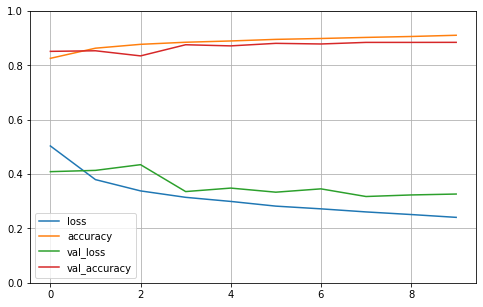

In [44]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]

In [45]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3458 - accuracy: 0.8784 - 983ms/epoch - 3ms/step

Test accuracy: 0.8784000277519226


In [46]:
# ignore the warning if any
predictions = model.predict(test_images)

In [47]:
predictions[0]

array([2.4378237e-06, 3.6920170e-07, 1.9985675e-06, 1.7534465e-05,
       5.0463960e-08, 4.3162864e-04, 4.1788126e-06, 1.4241762e-02,
       2.6688534e-07, 9.8529983e-01], dtype=float32)

In [48]:
np.argmax(predictions[0])

9

> You can read more on MNIST fashion example [here](https://www.tensorflow.org/tutorials/keras/classification).

### California House Pricing

Next, we're going to build a regression model for Califronia house pricing.

In [49]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [50]:
# fetch data
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
X_train_full, y_train_full)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [51]:
print(X_train.shape)
print(X_test.shape)

(11610, 8)
(5160, 8)


In [52]:
# build a regression NN
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1) # output layer with 1 neuron and with None activation function because it's regression
])

# compile NN
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 1.1111 - val_loss: 0.5417
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4914 - val_loss: 0.4415
Epoch 3/20
363/363 [==============================] - 2s 4ms/step - loss: 0.4390 - val_loss: 0.4123
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4180 - val_loss: 0.4043
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4063 - val_loss: 0.3876
Epoch 6/20
363/363 [==============================] - 2s 4ms/step - loss: 0.3958 - val_loss: 0.3861
Epoch 7/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3883 - val_loss: 0.3739
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3840 - val_loss: 0.3712
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3795 - val_loss: 0.3718
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3751 - val_loss: 0.3638

In [53]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3437


In [54]:
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)

In [55]:
y_pred

array([[0.07651627],
       [6.023957  ],
       [3.4127908 ]], dtype=float32)

### Saving and Restoring the Models

When using the Sequential API or the Functional API, saving a trained Keras model is as simple as it gets:

In [56]:
model.save("my_keras_model.h5")

You will typically have a script that trains a model and saves it, and one or more scripts (or web services) that load the model and use it to make predictions. Loading the model is just as easy:

In [57]:
model = keras.models.load_model("my_keras_model.h5")

### Callbacks

What if training lasts several hours? This is quite common, especially when training on large datasets.

In this case, you should not only save your model at the end of training, but also save **checkpoints** at regular intervals during training, to avoid losing everything if your computer crashes.

How can you tell the `fit()` method to save **checkpoints**? Use **callbacks**.

The `fit()` method accepts a `callbacks` argument that lets you specify a list of objects that Keras will call at the start and end of training, at the start and end of each epoch, and even before and after processing each batch. For example, the `ModelCheckpoint` callback saves checkpoints of your model at regular intervals during training, by default at the end of each epoch.

Moreover, if you use a validation set during training, you can set `save_best_only=True` when creating the `ModelCheckpoint` .

In this case, it will only save your model when its performance on the validation set is the best so far. This way, you do not need to worry about training for too long and overfitting the training set: simply restore the last model saved after training, and this will be the best model on the validation set. 

In [58]:
# build model
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [60]:
# compile model
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

The following code is a simple way to implement **early stopping**:

In [61]:
# create checkpoint
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

In [62]:
# train with callbacks and validation_data
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 2s 3ms/step - loss: 2.1880 - val_loss: 0.9890
Epoch 2/10
363/363 [==============================] - 1s 3ms/step - loss: 0.8320 - val_loss: 0.7537
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7090 - val_loss: 0.6884
Epoch 4/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6597 - val_loss: 0.6451
Epoch 5/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6264 - val_loss: 0.6198
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5976 - val_loss: 0.6108
Epoch 7/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5727 - val_loss: 0.5645
Epoch 8/10
363/363 [==============================] - 1s 3ms/step - loss: 0.5514 - val_loss: 0.5451
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5344 - val_loss: 0.5334
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5180 - val_loss: 0.5209

In [63]:
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.4883


> Another way to implement **early stopping** is to simply use the `EarlyStopping` callback. It will interrupt training when it measures no progress on the validation set for a number of epochs (defined by the `patience` argument), and it will optionally roll back to the best model.

> You can combine both callbacks to save checkpoints of your model (in case your computer crashes) and interrupt training early when there is no more progress (to avoid wasting time and resources):

In [64]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 2s 4ms/step - loss: 0.5046 - val_loss: 0.5100
Epoch 2/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4940 - val_loss: 0.4964
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4805 - val_loss: 0.4759
Epoch 4/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4740 - val_loss: 0.4685
Epoch 5/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4670 - val_loss: 0.4636
Epoch 6/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4596 - val_loss: 0.4617
Epoch 7/100
363/363 [==============================] - 2s 5ms/step - loss: 0.4533 - val_loss: 0.4489
Epoch 8/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4493 - val_loss: 0.4521
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4452 - val_loss: 0.4415
Epoch 10/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4408 - val_lo

> If you need extra control, you can easily write your own custom callbacks. As an example of how to do that, the following custom callback will display the ratio between the validation loss and the training loss during training (e.g., to detect over‐fitting):

In [65]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [66]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

346/363 [===========================>..] - ETA: 0s - loss: 0.3424
val/train: 1.00
363/363 [==============================] - 2s 6ms/step - loss: 0.3423 - val_loss: 0.3416


### Tensorboard

A neat feature of Tensorflow and Keras is visulaization through Tensorboard. The following code shows how you can visualize your training using Tensorboard.

In [69]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir() # e.g., './my_logs/run_2019_06_07-15_15_22'

In [70]:
# Tensorboard Visualization
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3312 - val_loss: 0.3330
Epoch 2/30
363/363 [==============================] - 1s 4ms/step - loss: 0.3310 - val_loss: 0.3335
Epoch 3/30
363/363 [==============================] - 2s 5ms/step - loss: 0.3301 - val_loss: 0.3345
Epoch 4/30
363/363 [==============================] - 2s 6ms/step - loss: 0.3301 - val_loss: 0.3314
Epoch 5/30
363/363 [==============================] - 2s 6ms/step - loss: 0.3297 - val_loss: 0.3315
Epoch 6/30
363/363 [==============================] - 2s 6ms/step - loss: 0.3304 - val_loss: 0.3310
Epoch 7/30
363/363 [==============================] - 2s 5ms/step - loss: 0.3298 - val_loss: 0.3306
Epoch 8/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3292 - val_loss: 0.3305
Epoch 9/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3296 - val_loss: 0.3304
Epoch 10/30
363/363 [==============================] - 2s 5ms/step - loss: 0.3288 - val_loss: 0.3297

> Next, run the following command at the root of the project directory where `my_logs` has been saved (or from anywhere else, as long as you point to the appropriate log directory):

> `$ tensorboard --logdir=./my_logs --port=6006`

> And finally, once the server is up, you can open a web browser and go to:

> http://localhost:6006

## Exercise-1

**Exercise-1 has 10 points**.

In this exercise you'll try to build a neural network that predicts the price of a house according to a simple formula.

- Imagine if house pricing was as easy as a house costs 50k + 50k per bedroom, so that a 1 bedroom house costs 100k, a 2 bedroom house costs 150k and so on.

- How would you create a neural network that learns this relationship so that it would predict a 7 bedroom house as costing close to 400k.

**Hint**: Your network might work better if you scale the house price down. You don't have to give the answer 400...it might be better to create something that predicts the number 4, and then your answer is in the 'hundreds of thousands'.

In [139]:
# create data with at least 6 data points for x and y
xs = np.array([1, 2, 3, 10, 15, 12], dtype=float)
ys = np.array([.5, 1, 1.5, 5, 7.5, 6  ], dtype=float)

In [140]:
# build model with one layer and one neuron
model = keras.models.Sequential([
    keras.layers.Dense(units=1, input_shape=[1])
])

In [141]:
# compile model - be careful to use the correct loss for regression
model.compile(optimizer='sgd', loss='mean_squared_error')

In [142]:
# train model with 1000 epochs
model.fit(xs, ys, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 179ms/step - loss: 75.6009
Epoch 2/1000
1/1 [==============================] - 0s 2ms/step - loss: 29.3273
Epoch 3/1000
1/1 [==============================] - 0s 2ms/step - loss: 11.3777
Epoch 4/1000
1/1 [==============================] - 0s 3ms/step - loss: 4.4150
Epoch 5/1000
1/1 [==============================] - 0s 2ms/step - loss: 1.7141
Epoch 6/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.6664
Epoch 7/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.2600
Epoch 8/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.1023
Epoch 9/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0411
Epoch 10/1000
1/1 [==============================] - 0s 2ms/step - loss: 0.0174
Epoch 11/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0081
Epoch 12/1000
1/1 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 13/1000
1/1 [=========================

In [143]:
# predict the price for 7-bedroom house price
prediction = model.predict([7.0]) 
print(prediction*100000)

[[349997.59197235]]


## Exercise-2

**Exercise-2 has 20 points**.

In this notebook you learned how to do classification using Fashion MNIST, a data set containing items of clothing, and a similar dataset called MNIST which has items of handwriting -- the digits 0 through 9.

Write an MNIST classifier that trains to 99% accuracy or above, and does it without a fixed number of epochs -- i.e. you should stop training once you reach that level of accuracy using `callbacks`.

- **Requirements**:
1. It should succeed in less than 10 epochs.
2. When it reaches 99% or greater it should print out the string `"Reached 99% accuracy so cancelling training!"` as specified in the `myCallback` class.

In [145]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

mnist = tf.keras.datasets.mnist

# load data
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

In [146]:
# build model - be careful about the activation functions of the hidden layer and output layer
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')])

In [147]:
# compile model - be careful to use the correct loss for multi-class classification, metrics should be 'accuracy'
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
              

In [148]:
# train model with 10 epochs (will stop earlier) and callbacks
# Note: Your output should include the message: "Reached 99% accuracy so cancelling training!"
# The output should also include:
# <tensorflow.python.keras.callbacks.History at MEMORY_ADDRESS> 
model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2572 - accuracy: 0.9263
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1162 - accuracy: 0.9657
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0786 - accuracy: 0.9758
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0593 - accuracy: 0.9819
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0447 - accuracy: 0.9864
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0346 - accuracy: 0.9894
Epoch 7/10
1861/1875 [============================>.] - ETA: 0s - loss: 0.0275 - accuracy: 0.9913
Reached 99% accuracy so cancelling training!
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0277 - accuracy: 0.9912


### References

- [1] - [Tensorflow Website](https://www.tensorflow.org/)
- [2] - [Tensorflow Tutorials](https://www.tensorflow.org/tutorials)
- [3] - [Hands-On ML Textbook 2nd Edition](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)
- [4] - [DeepLearning.AI TensorFlow Developer Professional Certificate - Course-1](https://www.coursera.org/professional-certificates/tensorflow-in-practice)

## Grading and Submission

Name your notebook ```Lastname-tf-notebook.ipynb```. Submit the file using the ```tf-notebook``` link on Blackboard.

- tf-notebook has a total of 30 points which will be counted towards the "Assignment" section of your final grade.

- **RUN ALL CELLS REQUIREMENT**: You must run all cells to get the outputs and then attempt exercises. Otherwise, if any cell is not run with the correct output, your notebook gets ZERO even if you've completed the exercises.

Grading will be based on 

  * verification of correct installation of Tensorflow
  * error-free running of all the cells - all outputs and plots must be included - any missing output would cause the notebook to get ZERO!
  * correct answers to the exercises - Exercise-1 [10 points], Exercise-2 [20 points]
  
<font color=red><b>Due Date: Tuesday April 19th, 11:59PM</b></font>